In [8]:
import IPython.core.display as di

di.display_html('<script>jQuery(function() {if(jQuery("body.notebook_app").length==0) {jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lattice gas project

A lattice gas is a system of spins that can take a value of +1 and -1.  These spins do not interact with each other but they do interact with an external magnetic field, $H$.  The Hamiltonian for this system is thus:

$$
H(s_1, s_2, \dots, s_n) = -H \mu \sum_{i=1}^N s_i
$$

where $s_i$ is the spin coordinate of the $i$th spin.  The code in the cell below calculates the internal energy for a system of $N$ spins in an external magnetic field, $H$, in units of $H \mu$: 

In [10]:
def hamiltonian( s ) :
    energy = 0
    for spin in s : energy = energy - spin
    return energy

## Calculating the canonical partition function for this system

We can calculate the canonical partition function for a system of $n$ spins in a lattice gas model using:

$$
Z = \sum_{s_1=0}^1 \sum_{s_2=0}^1 \dots \sum_{s_n=0}^1 e^{-\beta H(s_1,s_2,\dots, s_n )}
$$

An analytical expression for this quantity can be determined can be determined as follows:

$$
\begin{aligned}
Z & = \sum_{s_1=0}^1 \sum_{s_2=0}^1 \dots \sum_{s_n=0}^1 e^{\beta H \mu\sum_{i=1}^n z(s_i) } \\
  & = \sum_{s_1=0}^1 \sum_{s_2=0}^1 \dots \sum_{s_n=0}^1 \prod_{i=1}^n e^{\beta H \mu z(s_i) } \\
  & = \left[ \sum_{s_1=0}^1 e^{\beta H \mu z(s_1) } \right] \left[ \sum_{s_2=0}^1 e^{\beta H \mu z(s_2) } \right] \dots \left[ \sum_{s_n=0}^1 e^{\beta H \mu z(s_n) } \right] \\
  & = \left[ e^{\beta H \mu} + e^{-\beta H \mu } \right] \left[ e^{\beta H \mu} + e^{-\beta H \mu} \right] \dots \left[ e^{\beta H \mu} + e^{-\beta H \mu} \right] \\
  & = \left[ e^{\beta H \mu} + e^{-\beta H \mu } \right]^n = 2^n \cosh^n(\beta H \mu )
\end{aligned}
$$

Alternatively we can calculate the value of the canonical partition function at a particular temperature for a small numbers of spins numerically using the first of the expressions in the cell.   The cell below thus contains a function that calculates the partition function for a system of $N$ spins exactly.  The value of the partition function for a system of 10 spins as a function of temperature is then shown plotted on a graph.

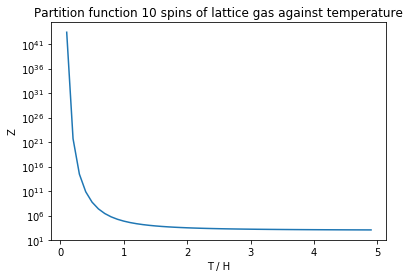

In [11]:
def calc_pfunc( n, T ) :
    pfunc, spins = 0, [0]*n
    for i in range( 2**n ) :
        iconf = i
        for j in range(n) :
            power = 2**(n-1-j)
            spins[j] = math.floor( iconf / power )
            iconf = iconf - spins[j]*power
            if spins[j]==0 : spins[j] = -1
            
        energy = hamiltonian( spins )
        pfunc += math.exp( - energy / T )
    return pfunc

xvals, yvals, dd = [], [], 0.1

for i in range(1,50) :
    xvals.append( dd*i )
    yvals.append( calc_pfunc( 10, dd*i ) )

plt.semilogy( xvals, yvals )
plt.title("Partition function 10 spins of lattice gas against temperature")
plt.xlabel('T / H')
plt.ylabel('Z')
plt.show()

# Calculating the ensemble average for the energy as a function of temperature

We can calculate the ensemble average of the energy for a lattice gas module using the following formula:

$$
\langle E \rangle = \frac{1}{Z} \sum_{s_1=0}^1 \sum_{s_2=0}^1 \dots \sum_{s_n=0}^1 H(s_1,s_2,\dots, s_n ) e^{-\beta H(s_1,s_2,\dots, s_n )}
$$

In addition, this ensemble average can be found by taking the partial derivative of the logarithm of the partition function with respect to inverse temperature:

$$
\langle E \rangle = - \left( \frac{ \partial \ln Z }{ \partial \beta} \right)
$$

When we do this for the analytical experssion that was derived in the previous markdown cell we find that:

$$
\begin{aligned}
\langle E \rangle = -\left( \frac{ \partial \ln Z }{ \partial \beta} \right) & =  -\frac{ \partial }{ \partial \beta} \left[ n \ln 2 + n \ln \cosh(\beta H \mu ) \right] \\
 & = - \frac{1}{\cosh(\beta H \mu ) } \frac{ \partial }{ \partial \beta} \cosh(\beta H \mu ) \\
 & = - \frac{-H \mu \sinh(\beta H \mu) }{\cosh(\beta H \mu ) } = -H \mu \tanh(\beta H \mu )
\end{aligned}
$$

The alternative is to calculate the ensemble average numerically using the first formula in this markdown cell.  In the cell below there is a function that calculates the ensemble average of the energy of $N$ spins exactly.  The value of the ensemble average for a system of 10 spins as a function of temperature is then shown plotted on a graph.

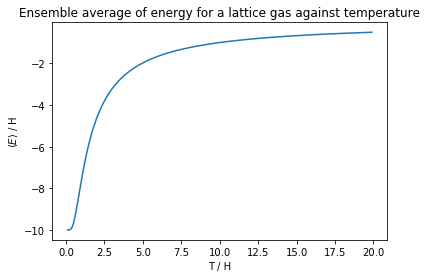

In [12]:
def calc_aenergy( n, T ) :
    pfunc, spins = 0, [0]*n
    for i in range( 2**n ) :
        iconf = i
        for j in range(n) :
            power = 2**(n-1-j)
            spins[j] = math.floor( iconf / power )
            iconf = iconf - spins[j]*power
            if spins[j]==0 : spins[j] = -1 
        energy = hamiltonian( spins )
        pfunc += energy*math.exp( -energy / T )
    return pfunc

xvals, yvals, dd = [], [], 0.1

for i in range(1,200) :
    xvals.append( dd*i )
    numer, denom = calc_aenergy( 10, dd*i ), calc_pfunc( 10, dd*i )
    yvals.append( numer / denom )

plt.plot( xvals, yvals )
plt.title("Ensemble average of energy for a lattice gas against temperature")
plt.xlabel('T / H')
plt.ylabel(r'$\langle E \rangle$ / H')
plt.show()

# Calculating the histogram as a function of the magnetization at two temperatures

We can also calculate the probability of the probability of occupying a state with a particular magnetism $m$ using

$$
P(M = m) = \frac{1}{Z} \sum_{s_1=0}^1 \sum_{s_2=0}^1 \dots \sum_{s_n=0}^1 \delta(M(s_1,s_2,\dots, s_n ),m) e^{-\beta H(s_1,s_2,\dots, s_n )}
$$

This is done below for two different temperatures and histograms are shown

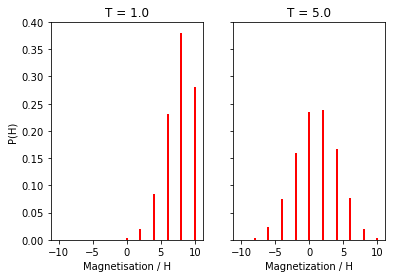

In [44]:
def build_histo( n, T ) :
    pfunc, spins, vals, hist = 0, [0]*n, [0]*(2*n+1), [0]*(2*n+1)
    for i in range( 2*n+1 ) : vals[i] = i - n
    for i in range( 2**n ) :
        iconf = i
        for j in range(n) :
            power = 2**(n-1-j)
            spins[j] = math.floor( iconf / power )
            iconf = iconf - spins[j]*power
            if spins[j]==0 : spins[j] = -1 
        mag, energy = 0, hamiltonian( spins )
        for spin in spins : mag = mag + spin
        hist[mag+n] = hist[mag+n] + math.exp( -energy / T )
    for i in range( 2*n+1 ) : hist[i] = hist[i] / calc_pfunc( n, T ) 
    return vals, hist

vals, hist = build_histo( 10, 1.0 )
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.set_title("T = 1.0")
ax1.set_xlabel("Magnetisation / H")
ax1.set_ylabel("P(H)")
rects = ax1.bar( vals, hist, [0.3]*(21), color='r')
vals, hist = build_histo( 10, 10.0 )
ax2.set_title("T = 5.0")
ax2.set_xlabel("Magnetization / H")
rects = ax2.bar( vals, hist, [0.3]*21, color="r" )
plt.show()

## Calculating the spin-spin correlation function

The spin-spin correlation function is calculated using:

$$
\delta(r) = \frac{\langle (s_i - \langle s_i \rangle )( s_{i+r} - \langle s_i \rangle ) \rangle }{ \langle (s_i - \langle s_i \rangle )^2 }
$$

where $\langle s_i \rangle$ is the ensemble average for the spin variables.  This quantity can be used to give a sense of the strength of the interaction between pairs of spins that are separated by different numbers of spins.

The code in the cell below calculates the spin-spin correlation function for a set of 10 spins in a magentic field.

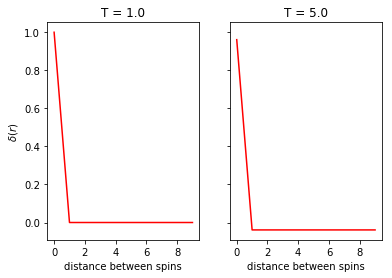

In [45]:
def calc_average_spin( n, T ) :
    pfunc, spins = 0, [0]*n
    for i in range( 2**n ) :
        iconf = i
        for j in range(n) :
            power = 2**(n-1-j)
            spins[j] = math.floor( iconf / power )
            iconf = iconf - spins[j]*power
            if spins[j]==0 : spins[j] = -1 
        energy = hamiltonian( spins )
        for j in range(n) : pfunc += spins[j]*math.exp( -energy / T ) / float(n)
    return pfunc / calc_pfunc( n, T )

def calc_average_correlation( n, T, r ) :
    pfunc, spins, average = 0, [0]*n, calc_average_spin( n, T ) 
    for i in range( 2**n ) :
        iconf = i
        for j in range(n) :
            power = 2**(n-1-j)
            spins[j] = math.floor( iconf / power )
            iconf = iconf - spins[j]*power
            if spins[j]==0 : spins[j] = -1 
        energy = hamiltonian( spins )
        for j in range(n) : 
            norm = (spins[j]-average)*(spins[j]-average)
            correlation = (spins[j]-average)*(spins[(j+r)%n]-average)
            pfunc += (correlation/norm)*math.exp( -energy / T ) / float(n)
    return pfunc / calc_pfunc( n, T )

correlation = []
for i in range(10) : correlation.append( calc_average_correlation( 10, 1.0, i ) )
    
vals = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] 
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.set_title("T = 1.0")
ax1.set_xlabel("distance between spins")
ax1.set_ylabel(r'$\delta(r)$')
rects = ax1.plot( vals, correlation, color='r')

average, correlation = calc_average_spin( 10, 5.0), []
for i in range(10) : correlation.append( calc_average_correlation( 10, 5.0, i ) - average*average)
    
ax2.set_title("T = 5.0")
ax2.set_xlabel("distance between spins")
rects = ax2.plot( vals, correlation, color='r')
plt.show()

## The limits of the (exact) numerical solution

Here you should explain why we can only calculate the solutions to these problems numerically when the number of sites in the model is small.